<a href="https://colab.research.google.com/github/CFVV/MSc-assignments/blob/main/2022-2_Computer_Audition/T3_Low-level%20temporal%20descriptors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 3: Descriptores temporales de bajo nivel

## Autora: Camila Vera Villa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Magíster en Ciencias de la Ingeniería UC/2022-2_Audición_computador/Taller3:Descriptores temporales"

In [ ]:
! pip install functools

  ERROR: Failed building wheel for functools
  Running setup.py clean for functools
Failed to build functools
    Running setup.py install for functools ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-7se2oh41/functools_dcf18f8c77944212835b545d978a251d/setup.py'"'"'; __file__='"'"'/tmp/pip-install-7se2oh41/functools_dcf18f8c77944212835b545d978a251d/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-133cyqe3/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/functools Check the logs for full command output.


In [ ]:
%matplotlib inline
from pylab import *
from IPython.html.widgets import interact, fixed
from IPython.display import display
from IPython.display import Audio
from scipy.signal import square
import re
import soundfile as sf
from scipy.io import wavfile
from scipy.stats import skew, kurtosis
import pandas as pd
import seaborn as sn
plt.rcParams['figure.figsize'] = (10,7)

import scipy.fftpack as fourier
import scipy.io.wavfile as waves
import wave
import functools

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Pregunta 2: Cálculo de descriptores temporales

In [ ]:
ejemplo = waves.read(path + "/ejemplo.wav")[1]

In [ ]:
ejemplo.shape

(661500, 2)

Antes de calcularlos vamos a hacer Down-Mixing para obtener la señal en un solo canal

In [ ]:
downMixed_signal = np.array([np.mean([x[0], x[1]]) for x in ejemplo])

In [ ]:
downMixed_signal.shape

(661500,)

In [ ]:
segmented_ejemplo = [downMixed_signal[i*1024:(i+1)*1024] for i in range(int(downMixed_signal.shape[0]/1024))]

In [ ]:
print(f'Número de segmentos generados: {len(segmented_ejemplo)}')

Número de segmentos generados: 645


Descriptores a calcular:

> - Centroide
> - Promedio aritmético
> - Varianza
> - Skewness
> - Kurtosis
> - RMS
> - Máxima Amplitud
> - Cruces por cero


In [ ]:
epsilon = 1e-3
get_centroid = lambda x: np.average(x, weights = range(0, len(x)))/(np.sum(x)+epsilon)
get_arithmeticMean = lambda x: np.mean(x)
get_variance = lambda x: np.var(x)
get_skewness = lambda x: skew(x)
get_kurtosis = lambda x: kurtosis(x)
get_RMS = lambda x: np.sqrt(np.sum([value**2 for value in x])/len(x))
get_MaxAmplitude = lambda x: np.max(x)
get_ZeroCrossing = lambda segmento: functools.reduce(
                                    lambda x,y: x+y,
                                            map(lambda x: np.abs(x[0]-x[1]),
                                                [(segmento[i], segmento[i-1]) for i in range(1,len(segmento))]))/(2*len(segmento))

In [ ]:
centroid_results = [get_centroid(segmento) for segmento in segmented_ejemplo]
arithmeticMean_results = [get_arithmeticMean(segmento) for segmento in segmented_ejemplo]
variance_results = [get_variance(segmento) for segmento in segmented_ejemplo]
skewness_results = [get_skewness(segmento) for segmento in segmented_ejemplo]
kurtosis_results = [get_kurtosis(segmento) for segmento in segmented_ejemplo]
rms_results = [get_RMS(segmento) for segmento in segmented_ejemplo]
maxAmplitude_results = [get_MaxAmplitude(segmento) for segmento in segmented_ejemplo]
zeroCrossing_results = [get_ZeroCrossing(segmento) for segmento in segmented_ejemplo]

resultados_descriptores = pd.DataFrame({'centroid':centroid_results,
                                        'arithmetic_mean': arithmeticMean_results,
                                        'variance': variance_results,
                                        'skewness': skewness_results,
                                        'kurtosis': kurtosis_results,
                                        'RMS': rms_results,
                                        'maxAmplitude': maxAmplitude_results,
                                        'Zero_Crossing': zeroCrossing_results})

In [ ]:
resultados_descriptores

,centroid,arithmetic_mean,variance,skewness,kurtosis,RMS,maxAmplitude,Zero_Crossing
0,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
640,-0.001454,-0.014450,0.042352,-0.297661,-0.919299,0.206302,0.368623,0.010333
641,0.000011,-0.005502,0.028607,-0.298780,-0.499637,0.169224,0.393744,0.021594
642,0.003718,-0.003537,0.022791,-0.077448,-0.555181,0.151009,0.410711,0.029271
643,0.000328,0.006918,0.012053,-0.035787,0.151240,0.110003,0.410035,0.034879


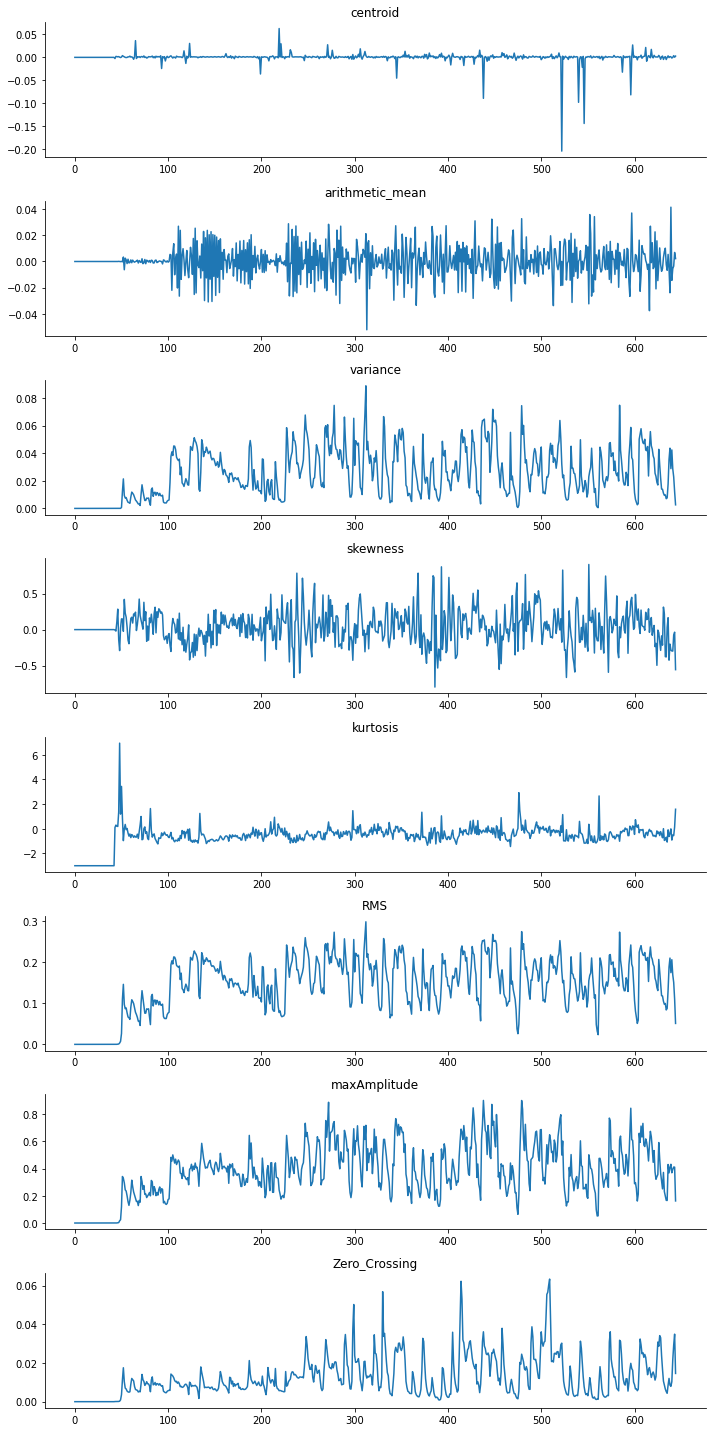

In [ ]:
fig, _ = plt.subplots(figsize = (10,20))
for i, (colname, col_values) in enumerate(resultados_descriptores.iteritems()):
    plt.subplot(resultados_descriptores.shape[1],1, i+1)
    plt.title(colname)
    plt.plot(col_values)
    sn.despine()
    plt.tight_layout()

# Pregunta 3: Cálculo de descriptores temporales

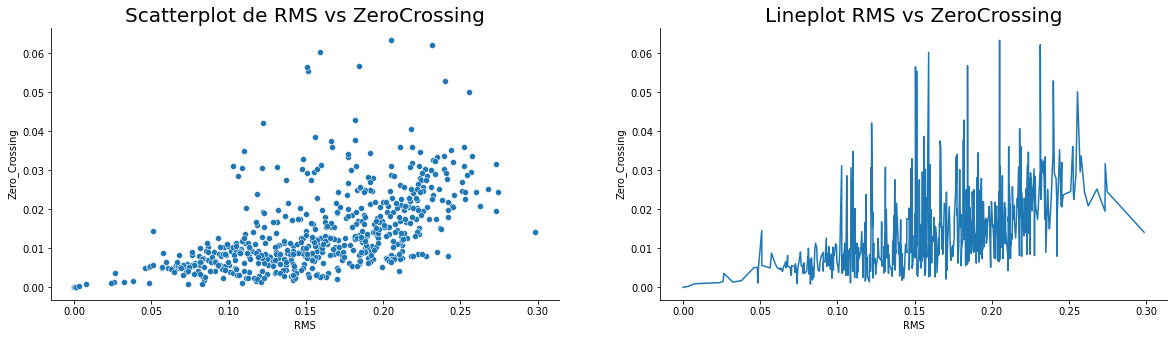

In [ ]:
fig, _ = plt.subplots(figsize = (20,5))
plt.subplot(1,2,1)
sn.scatterplot(x = 'RMS', y = 'Zero_Crossing', data = resultados_descriptores)
plt.title('Scatterplot de RMS vs ZeroCrossing', fontsize = 20)
sn.despine()

plt.subplot(1,2,2)
plt.title('Lineplot RMS vs ZeroCrossing', fontsize = 20)
sn.lineplot(x = 'RMS', y = 'Zero_Crossing', data = resultados_descriptores)
sn.despine()

# Pregunta 4: Cálculo de descriptores temporales

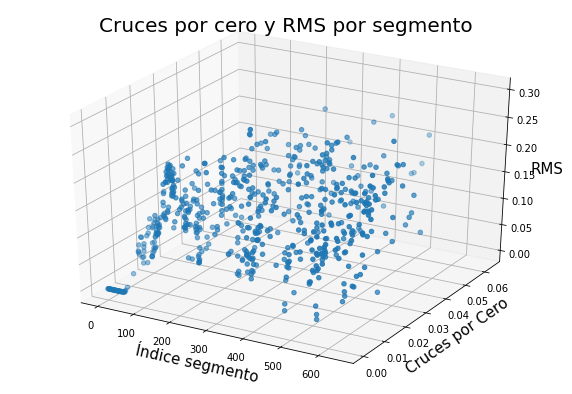

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(resultados_descriptores.index, resultados_descriptores['Zero_Crossing'], resultados_descriptores['RMS'], cmap='viridis')
ax.set_xlabel('Índice segmento', fontsize=15)
ax.set_ylabel('Cruces por Cero', fontsize=15)
ax.set_zlabel('RMS', fontsize=15)
plt.title('Cruces por cero y RMS por segmento', fontsize = 20);

# Pregunta 5: Mejorando la Resolución Temporal

## Gráficos de descriptores temporales
### Traslapado de 25%

In [ ]:
segmented_ejemplo_25 = [downMixed_signal[i*(1024-256): i*(1024-256) + 1024] for i in range(int(downMixed_signal.shape[0]/1024))]

In [ ]:
segmented_ejemplo_25[0].shape

(1024,)

In [ ]:
centroid_results = [get_centroid(segmento) for segmento in segmented_ejemplo_25]
arithmeticMean_results = [get_arithmeticMean(segmento) for segmento in segmented_ejemplo_25]
variance_results = [get_variance(segmento) for segmento in segmented_ejemplo_25]
skewness_results = [get_skewness(segmento) for segmento in segmented_ejemplo_25]
kurtosis_results = [get_kurtosis(segmento) for segmento in segmented_ejemplo_25]
rms_results = [get_RMS(segmento) for segmento in segmented_ejemplo_25]
maxAmplitude_results = [get_MaxAmplitude(segmento) for segmento in segmented_ejemplo_25]
zeroCrossing_results = [get_ZeroCrossing(segmento) for segmento in segmented_ejemplo_25]

resultados_descriptores_25 = pd.DataFrame({'centroid':centroid_results,
                                        'arithmetic_mean': arithmeticMean_results,
                                        'variance': variance_results,
                                        'skewness': skewness_results,
                                        'kurtosis': kurtosis_results,
                                        'RMS': rms_results,
                                        'maxAmplitude': maxAmplitude_results,
                                        'Zero_Crossing': zeroCrossing_results})

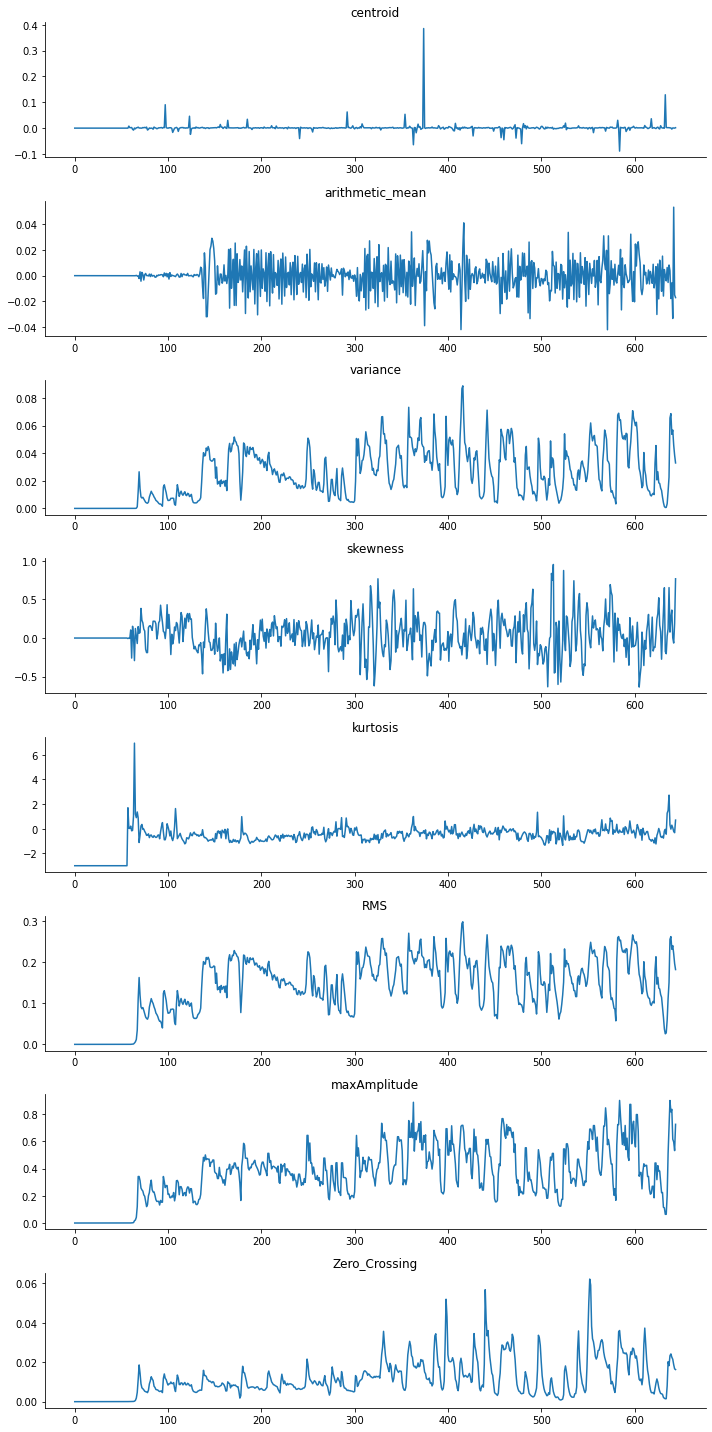

In [ ]:
fig, _ = plt.subplots(figsize = (10,20))
for i, (colname, col_values) in enumerate(resultados_descriptores_25.iteritems()):
    plt.subplot(resultados_descriptores_25.shape[1],1, i+1)
    plt.title(colname)
    plt.plot(col_values)
    sn.despine()
    plt.tight_layout()

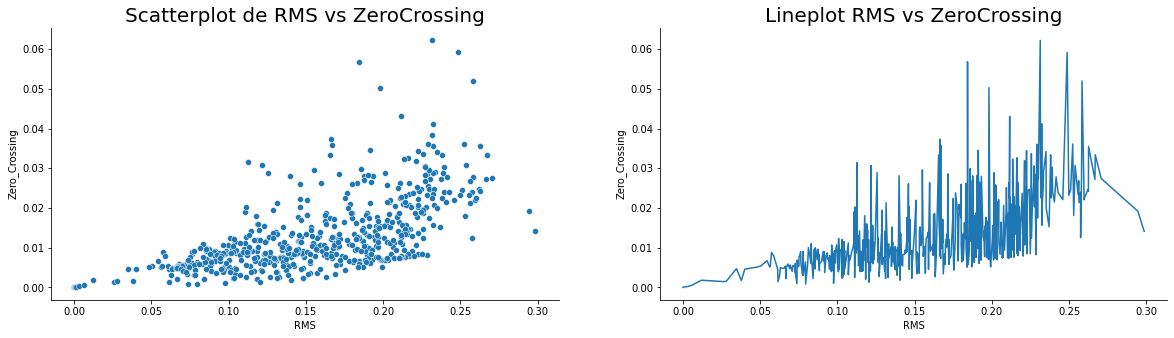

In [ ]:
fig, _ = plt.subplots(figsize = (20,5))
plt.subplot(1,2,1)
sn.scatterplot(x = 'RMS', y = 'Zero_Crossing', data = resultados_descriptores_25)
plt.title('Scatterplot de RMS vs ZeroCrossing', fontsize = 20)
sn.despine()

plt.subplot(1,2,2)
plt.title('Lineplot RMS vs ZeroCrossing', fontsize = 20)
sn.lineplot(x = 'RMS', y = 'Zero_Crossing', data = resultados_descriptores_25)
sn.despine()

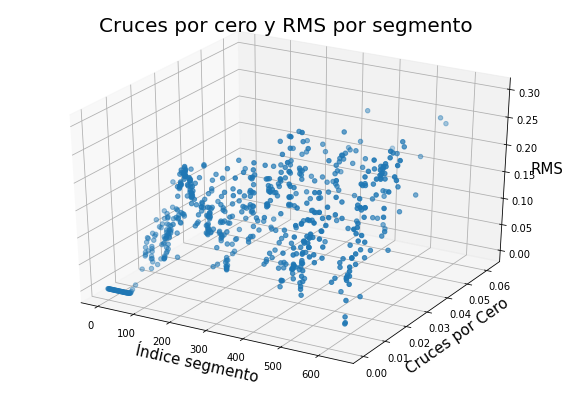

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(resultados_descriptores_25.index, resultados_descriptores_25['Zero_Crossing'], resultados_descriptores_25['RMS'], cmap='viridis')
ax.set_xlabel('Índice segmento', fontsize=15)
ax.set_ylabel('Cruces por Cero', fontsize=15)
ax.set_zlabel('RMS', fontsize=15)
plt.title('Cruces por cero y RMS por segmento', fontsize = 20);

### Traslapado de 50%

In [ ]:
segmented_ejemplo_50 = [downMixed_signal[i*(1024-512): i*(1024-512) + 1024] for i in range(int(downMixed_signal.shape[0]/1024))]

In [ ]:
centroid_results = [get_centroid(segmento) for segmento in segmented_ejemplo_50]
arithmeticMean_results = [get_arithmeticMean(segmento) for segmento in segmented_ejemplo_50]
variance_results = [get_variance(segmento) for segmento in segmented_ejemplo_50]
skewness_results = [get_skewness(segmento) for segmento in segmented_ejemplo_50]
kurtosis_results = [get_kurtosis(segmento) for segmento in segmented_ejemplo_50]
rms_results = [get_RMS(segmento) for segmento in segmented_ejemplo_50]
maxAmplitude_results = [get_MaxAmplitude(segmento) for segmento in segmented_ejemplo_50]
zeroCrossing_results = [get_ZeroCrossing(segmento) for segmento in segmented_ejemplo_50]

resultados_descriptores_50 = pd.DataFrame({'centroid':centroid_results,
                                        'arithmetic_mean': arithmeticMean_results,
                                        'variance': variance_results,
                                        'skewness': skewness_results,
                                        'kurtosis': kurtosis_results,
                                        'RMS': rms_results,
                                        'maxAmplitude': maxAmplitude_results,
                                        'Zero_Crossing': zeroCrossing_results})

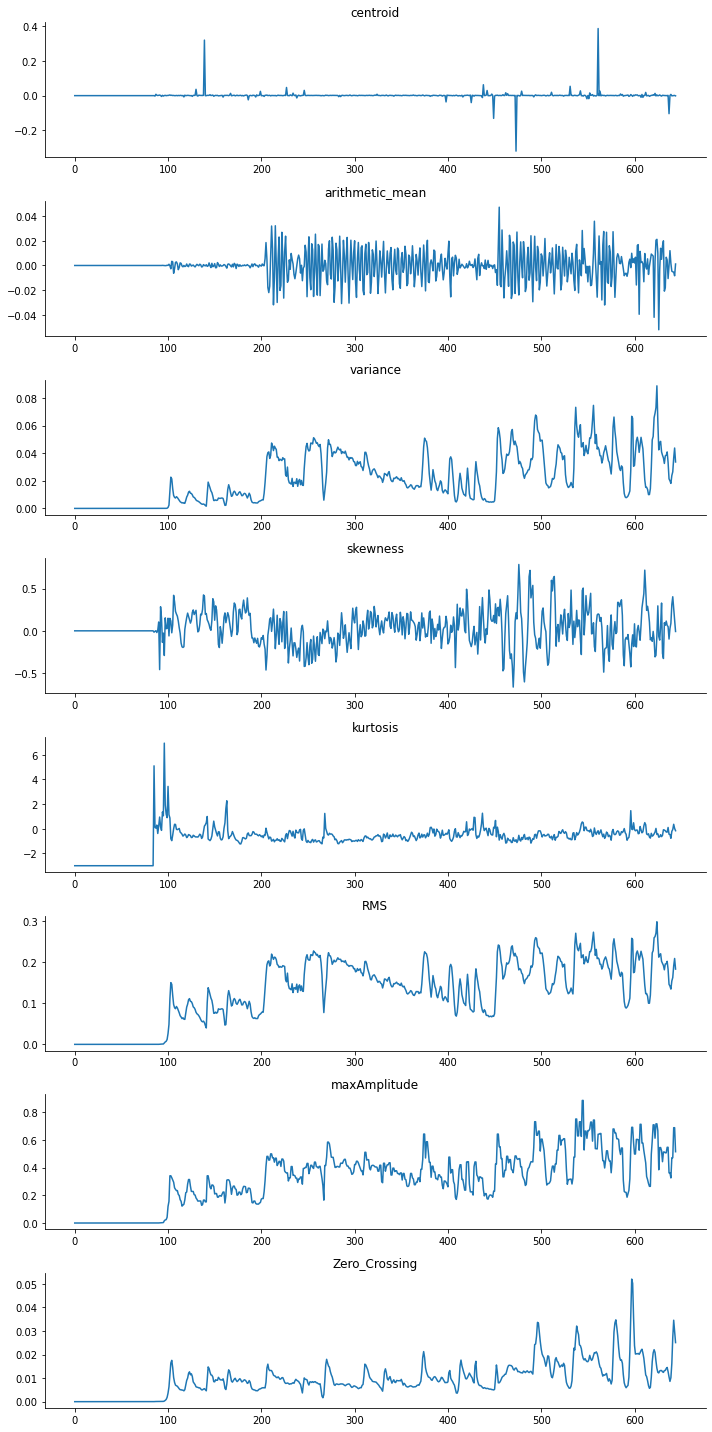

In [ ]:
fig, _ = plt.subplots(figsize = (10,20))
for i, (colname, col_values) in enumerate(resultados_descriptores_50.iteritems()):
    plt.subplot(resultados_descriptores_50.shape[1],1, i+1)
    plt.title(colname)
    plt.plot(col_values)
    sn.despine()
    plt.tight_layout()

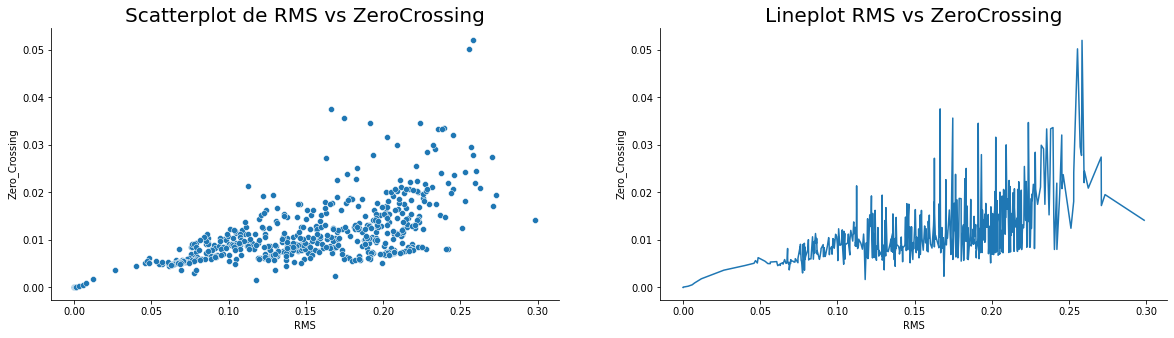

In [ ]:
fig, _ = plt.subplots(figsize = (20,5))
plt.subplot(1,2,1)
sn.scatterplot(x = 'RMS', y = 'Zero_Crossing', data = resultados_descriptores_50)
plt.title('Scatterplot de RMS vs ZeroCrossing', fontsize = 20)
sn.despine()

plt.subplot(1,2,2)
plt.title('Lineplot RMS vs ZeroCrossing', fontsize = 20)
sn.lineplot(x = 'RMS', y = 'Zero_Crossing', data = resultados_descriptores_50)
sn.despine()

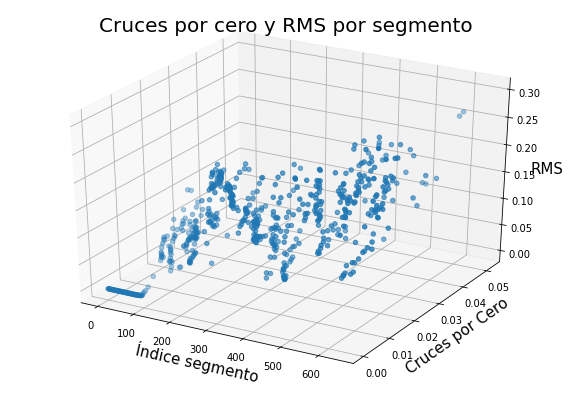

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(resultados_descriptores_50.index, resultados_descriptores_50['Zero_Crossing'], resultados_descriptores_50['RMS'], cmap='viridis')
ax.set_xlabel('Índice segmento', fontsize=15)
ax.set_ylabel('Cruces por Cero', fontsize=15)
ax.set_zlabel('RMS', fontsize=15)
plt.title('Cruces por cero y RMS por segmento', fontsize = 20);